In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

#Import textfiles
gainFile = "Gain_Zenith_PVA.txt"
phaseFile = "Phase_Zenith_PVA.txt"
unwrappedPhaseFile = "Unwrapped_Phase_Zenith_PVA.txt"

gainData = np.genfromtxt(gainFile,skip_header=1, dtype=None, delimiter=',')
phaseData = np.genfromtxt(phaseFile,skip_header=1, dtype=None, delimiter=',')
unwrappedPhaseData = np.genfromtxt(unwrappedPhaseFile,skip_header=1, dtype=None, delimiter=',')

In [22]:
#Create initial arrays for frequency, zenith, and azimuth (which we have symmetry, but it's good to write anyways)
inputZenith = gainData[:,0] #Mohammad's data goes from zero to 360 since he rotated the whole antenna on a table.
inputAzimuth = np.arange(0,361) #We have azimuthal symmetry in the PVA and ARA antennas, but we keep this format due to how XF outputs things and if we want to simulate non-azimuthally symmetric antennas.
inputFreq = np.arange(50,1050,50) #Mohammad measured every 50 MHz, which I'll need to interpolate to what we have in the AraSim data for antennas.

#Truncate first column form gain and phase data as it contains the zenith angles
gain = gainData[:,1:]
phase = phaseData[:,1:]
unwrappedPhase = unwrappedPhaseData[:,1:]

Text(0, 0.5, 'Gain [dB]')

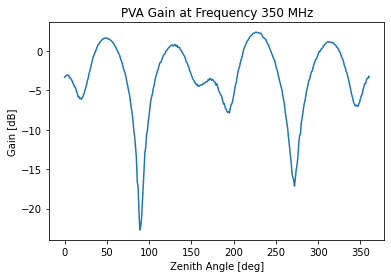

In [35]:
index = 6
plt.plot(inputZenith, gain[:,index])
plt.title("PVA Gain at Frequency " + str(inputFreq[index]) + " MHz")
plt.xlabel("Zenith Angle [deg]")
plt.ylabel("Gain [dB]")

Text(0, 0.5, 'Gain [db]')

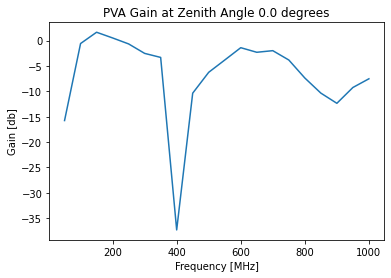

In [34]:
index = 0
plt.plot(inputFreq, gain[index,:])
plt.title("PVA Gain at Zenith Angle " + str(inputZenith[index]) + " degrees")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Gain [db]")

In [4]:
gainData[:,:].shape

(362, 21)

In [6]:
#Create arrays for interpolation into the XF format
outputZenith = np.arange(0,185,5)
outputAzimuth = np.arange(0,360,5)
outputFreq = 1/6*np.arange(500,6500,100) #XF stores frequency in intervals of 100/6 for some reason.

In [7]:
print(inputFreq.shape)
print(inputZenith.shape)
print(gain.shape)

(20,)
(362,)
(362, 20)


In [8]:
zip(inputFreq,inputZenith)

In [9]:
list(zip(inputZenith,inputFreq))

[(0.0, 50),
 (1.0, 100),
 (2.0, 150),
 (3.0, 200),
 (4.0, 250),
 (5.0, 300),
 (6.0, 350),
 (7.0, 400),
 (8.0, 450),
 (9.0, 500),
 (10.0, 550),
 (11.0, 600),
 (12.0, 650),
 (13.0, 700),
 (14.0, 750),
 (15.0, 800),
 (16.0, 850),
 (17.0, 900),
 (18.0, 950),
 (19.0, 1000)]

In [10]:
#Interpolate Gain, Phase, and Unwrapped phase as functions of frequency and theta.
interpGain = sc.interpolate.LinearNDInterpolator(list(zip(inputFreq,inputZenith)),gain)

ValueError: different number of values and points

In [ ]:
#Interpolate Gain, Phase, and Unwrapped phase as functions of frequency and theta.
points= (inputFreq, inputZenith, gain)
interpGain = sc.interpolate.interpn(points)

In [17]:
points= (inputFreq, inputZenith)
interpGain = sc.interpolate.RegularGridInterpolator(points, gain)

ValueError: The points in dimension 1 must be strictly ascending or descending